# Linear Regression Analysis

## Setup

In [43]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline 

In [44]:
# Load data
data = pd.read_csv('data/ames_lr.csv')

In [45]:
# Create the independent variables and the target
predictors = data.drop('SalePrice', axis=1)
target = data['SalePrice']

In [46]:
# Check the columns in predictors
column_names = predictors.columns.tolist()
for column in column_names:
    print(column)


GrLivArea
LotFrontage
LotArea
OverallQual
OverallCond
MasVnrArea
ExterQual
ExterCond
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
YearsSinceBuilt
YearsSinceRemod
Crisis
MSZoning_C (all)
MSZoning_FV
MSZoning_I (all)
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Pave
Alley_None
Alley_Pave
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_NoSewr
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_Greens
Neighborhood_GrnHill
Neighborhood_IDOTRR
Neighborhood_Landmrk
Neighborhood_MeadowV
Ne

## Split Data into Train-Test Sets

In [47]:
# Split the data into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=0)

In [48]:
X_train.head()

,GrLivArea,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtFinSF1,BsmtFinSF2,...,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
1138,1792,80.0,12435,7,5,172.0,4,3,361.0,0.0,...,0,0,0,0,1,0,0,0,0,0
411,864,0.0,8499,5,6,0.0,3,3,660.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2301,1595,60.0,7200,6,8,0.0,3,5,338.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1697,1692,0.0,9337,7,5,0.0,3,3,353.0,0.0,...,0,0,0,0,1,0,0,0,0,0
1347,1720,65.0,10816,9,5,364.0,5,3,1104.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y_train.head()

1138    231500
411     141000
2301    155500
1697    191000
1347    332000
Name: SalePrice, dtype: int64

## Data Prep and Feature Selection

Linear Regression has several key assumptions:
1. **Linearity** - there should be a linear relationship between the independent (predictor) variables and the dependent (response) variable
2. **Independence of Errors** - residuals should be independent of each other with no correlation
3. **Homoscedasticity** - residuals should have constant variance across the range of predicted values
4. **Normality of errors** - residuals should be approximiately normally distributed
5. **No or little multicollinearity** - independent variables should not be highly correlated with each other

From our EDA, we already know that the full dataset has signifiicant multicollinearity.  As a result, we will build the feature set "bottoms up."  We'll use the analysis done in the EDA to select these.  To create a parsimonious model, we'll only pick the features that seem to show high correlation to the target variable.

In [50]:
# Create linear regression object
lr = LinearRegression()

# 'GarageCars' - show linear regression for GarageCars
lr.fit(X_train[['GarageCars']], y_train)
print("GarageCars R^2 score: ", lr.score(X_train[['GarageCars']], y_train))

# 'GrLivArea' - show linear regression for GrLivArea
lr.fit(X_train[['GrLivArea']], y_train)
print("GrLivArea R^2 score: ", lr.score(X_train[['GrLivArea']], y_train))

# 'Neighborhood' - show linear regression for encoded Neighborhood
neighborhood_columns = [col for col in predictors.columns if col.startswith('Neighborhood')]
lr.fit(X_train[neighborhood_columns], y_train)
print("Neighborhood (one-hot encoded) R^2 score: ", lr.score(X_train[neighborhood_columns], y_train))

# 'OverallQual' - show linear regression for OverallQual
lr.fit(X_train[['OverallQual']], y_train)
print("OverallQual R^2 score: ", lr.score(X_train[['OverallQual']], y_train))

# 'TotalBsmtSF' - show linear regression for TotalBsmtSF
lr.fit(X_train[['TotalBsmtSF']], y_train)
print("TotalBsmtSF R^2 score: ", lr.score(X_train[['TotalBsmtSF']], y_train))

# 'YearsSinceBuilt' - show linear regression for YearsSinceRemod
lr.fit(X_train[['YearsSinceBuilt']], y_train)
print("YearsSinceBuilt R^2 score: ", lr.score(X_train[['YearsSinceBuilt']], y_train))

GarageCars R^2 score:  0.4011518970204133
GrLivArea R^2 score:  0.5254389934847536
Neighborhood (one-hot encoded) R^2 score:  0.5658084091604905
OverallQual R^2 score:  0.6286470107557833
TotalBsmtSF R^2 score:  0.42890898177021497
YearsSinceBuilt R^2 score:  0.2945300762129046


To create a parsimonious model, we'll only pick the features that seem to show high correlation to the target variable

In [51]:
# Gather selected features for training set
X_train = pd.concat([X_train[['GarageCars']],
                     X_train[['GrLivArea']],
                     X_train[neighborhood_columns],
                     X_train[['OverallQual']],
                     X_train[['TotalBsmtSF']],
                     X_train[['YearsSinceBuilt']]],
                     axis=1)

print(X_train.columns)

Index(['GarageCars', 'GrLivArea', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'OverallQual',
       'TotalBsmtSF', 'YearsSinceBuilt'],
      dtype='object')


In [55]:
# Gather selected features for test set
X_test = pd.concat([X_test[['GarageCars']],
                    X_test[['GrLivArea']],
                    X_test[neighborhood_columns],
                    X_test[['OverallQual']],
                    X_test[['TotalBsmtSF']],
                    X_test[['YearsSinceBuilt']]],
                    axis=1)

print(X_test.columns)   

Index(['GarageCars', 'GrLivArea', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill',
       'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'OverallQual',
       'TotalBsmtSF', 'YearsSinceBuilt'],
      dtype='object')


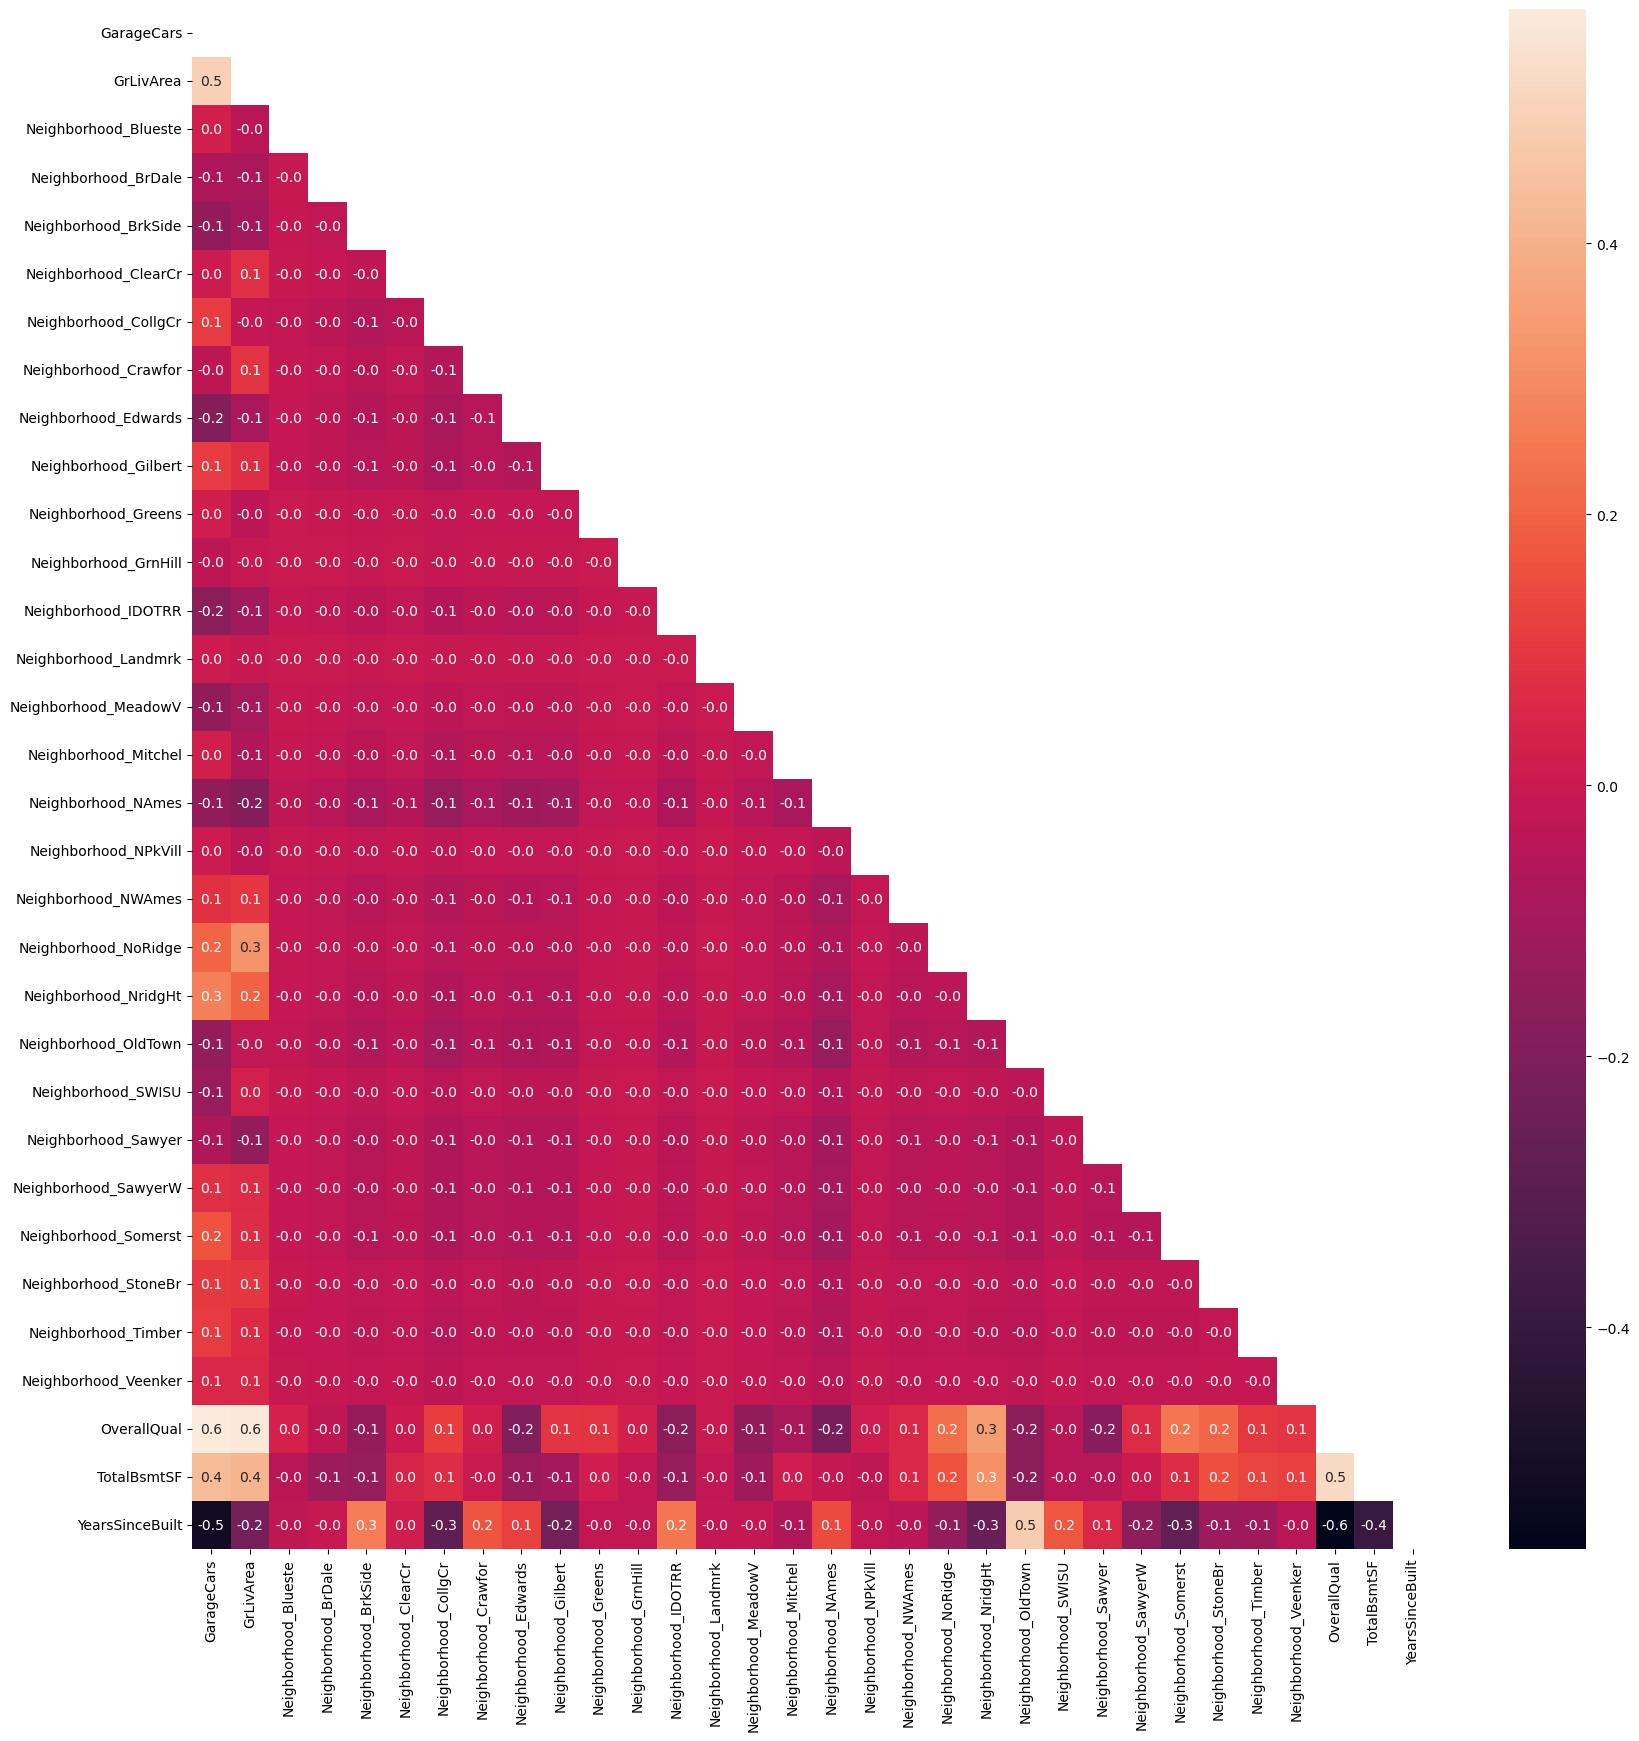

In [52]:
# Plot the correlation matrix
correlation_matrix = X_train.corr()

# Create a mask to hide upper triangle
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot the figure
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.1f')

# Show the plot
plt.show()

In [53]:
# Calculate the VIF for each feature in the selected_features DataFrame
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train.values, i)
              for i in range(X_train.shape[1])]

# Add the feature names to the VIF DataFrame
vif['Feature'] = X_train.columns

# Sort the VIF DataFrame by VIF values in descending order
vif = vif.sort_values(by='VIF', ascending=False)

# Print the VIF DataFrame
print(vif)

          VIF               Feature
29  48.420489           OverallQual
1   20.107321             GrLivArea
31  13.754070       YearsSinceBuilt
0   12.349542            GarageCars
30  12.084356           TotalBsmtSF
16   8.338659    Neighborhood_NAmes
21   7.345440  Neighborhood_OldTown
6    4.568650  Neighborhood_CollgCr
20   3.777435  Neighborhood_NridgHt
25   3.672770  Neighborhood_Somerst
4    3.671889  Neighborhood_BrkSide
8    3.640936  Neighborhood_Edwards
7    3.528869  Neighborhood_Crawfor
9    3.258133  Neighborhood_Gilbert
23   3.151253   Neighborhood_Sawyer
18   3.084336   Neighborhood_NWAmes
24   2.915469  Neighborhood_SawyerW
12   2.874010   Neighborhood_IDOTRR
19   2.700994  Neighborhood_NoRidge
15   2.421344  Neighborhood_Mitchel
22   2.120517    Neighborhood_SWISU
27   1.974305   Neighborhood_Timber
26   1.944590  Neighborhood_StoneBr
5    1.831359  Neighborhood_ClearCr
28   1.556078  Neighborhood_Veenker
3    1.461281   Neighborhood_BrDale
14   1.349134  Neighborhood_

Multicollinearity has improved, but we still have some high values, so the caveat is that the model's predictions may not be reliable.  We'll address this via regularization in later modules.

## Train Model

In [56]:
# Use cross-validation on train data
cross_val_scores = cross_val_score(lr, X_train, y_train, cv=5)
print(f"Average 5-Fold CV Score: {np.mean(cross_val_scores)}")

Average 5-Fold CV Score: 0.8393948418907977


In [57]:
# Fit the model to the training data
lr.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [58]:
# Display the metrics
print('R^2 on test set is equal to %.3f' %(lr.score(X_test, y_test)))
print('The intercept is equal to %.3f' %(lr.intercept_))
print('The slopes are %s' %(lr.coef_))

R^2 on test set is equal to 0.840
The intercept is equal to -49104.494
The slopes are [ 8.66435632e+03  5.10122977e+01 -4.27884792e+03 -8.67801614e+03
  1.80081986e+04  3.17922655e+04  1.41872207e+04  3.82513826e+04
  1.54131568e+04  1.10219900e+04  1.12384808e+04  1.19343970e+05
  9.37758541e+03 -8.83638583e+03  6.74505989e+03  1.33031489e+04
  1.17833423e+04 -9.53708013e+03  4.67502127e+03  5.36428540e+04
  5.63097961e+04  7.08644589e+03 -2.28710353e+02  1.56350932e+04
  7.65869781e+03  2.24254095e+04  6.09165811e+04  2.99177966e+04
  3.56584441e+04  1.55184659e+04  3.51597996e+01 -2.93266725e+02]


Text(0.5, 1.0, 'Distribution of Residuals')

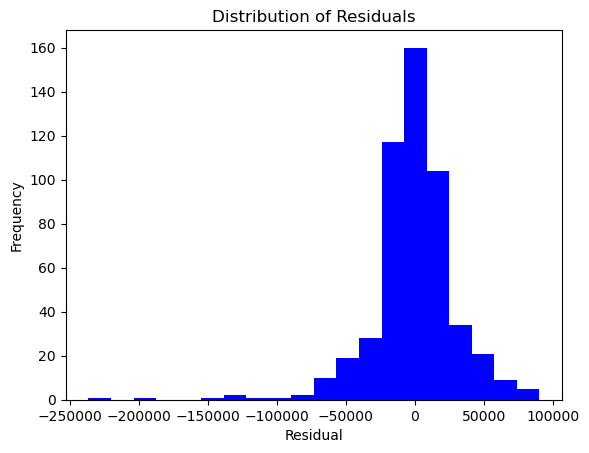

In [59]:
# Plot Distribution of Residuals

# Calculate the predictions on the test set
predictions = lr.predict(X_test)

# Calculate the residuals
residuals = predictions - y_test

# Plot a histogram of the residuals
plt.hist(residuals, bins=20, color='blue')

# Labels and title
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

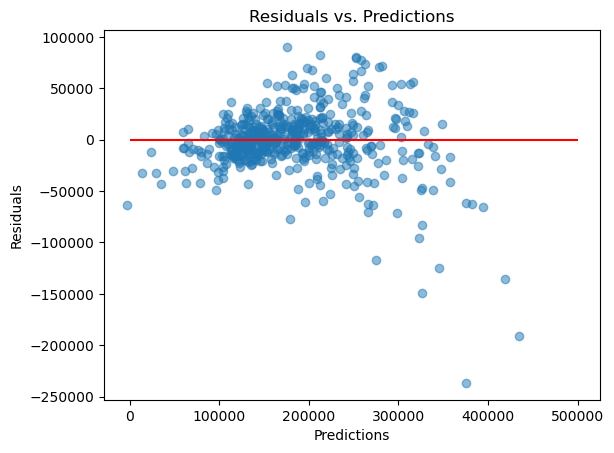

In [60]:
# Plot Residuals vs. Predictions

# Create the plot
plt.scatter(predictions, residuals, alpha=0.5)

# Labels and title
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predictions')

# Draw a horizontal line at y = 0
plt.hlines(y=0, xmin=0, xmax=500000, color='red')

# Show the plot
plt.show()

## Conclusion

We are able to get a decently accurate model using only a few predictors.  We will use this as a "baseline" for accuracy and interpretability for other ML models.

<br>
<br>


> **"Einstein said something along the lines of 'Make things as simple as possible, and no simpler.'  That's probably Rule Number 1 of modelling.**  
>
> **Rule Number 2 would be 'If you are going to make things more complicated then do so one new feature at a time.'**  
>
> **Already that's a big difference to machine learning in which one tends to throw in everything at the start, including the kitchen sink."**  
>
> Paul Wilmott, *Machine Learning: An Applied Mathematics Introduction*